# Western Governors University
## Data Mining I Part I:
### Shane Boyce

## Part I: Research Question

A.  Describe the purpose of this data mining report by doing the following:

1.  Propose one question relevant to a real-world organizational situation that you will answer using one of the following classification methods:

•  k-nearest neighbor (KNN)

•  Naive Bayes

Using features featured earlier in linear and logisitic regression analysis, can churn be predicted with an 70% accuracy with K-Nearest Neighbors?

2.  Define one goal of the data analysis. Ensure that your goal is reasonable within the scope of the scenario and is represented in the available data.

One goal will be to determine if the current selected features are sufficient for an 70% accuracy on the current data using train, test, predict split. If more than sufficient, less neighbors can be used to increase speed of the algorithm. If not, more features will be added to the data set.
 

In [1]:
# necessary import statements

#math, dataframes and visualizations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#settings to make the notebook read better
import warnings

import timeit

# sklearn libraries for classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

#scipy for t-test
from scipy.stats import ttest_ind

#personal scripts developed during the course lifecycle
import churn_helper as ch

#magic words and settings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', None)
np.random.seed(42069)

In [2]:
df = pd.read_csv('churn_clean.csv')
df.shape
ch.churnauotclean(df)

## Part II: Method Justification

B.  Explain the reasons for your chosen classification method from part A1 by doing the following:

1.  Explain how the classification method you chose analyzes the selected data set. Include expected outcomes.

KNN is one of the most widely used classification machine learning algorithms and is great for lazy learning(Starmer, 2017). Since the data is already labeled, and speed of processing is less important than accuracy, KNN is the go-to algorithm over Naive Bayes in this context.

2.  Summarize one assumption of the chosen classification method.

KNN assumes that similar data points are related and that the data is labeled. KNN also assumes that the data is not too noisy, meaning similar points are related and not at random (Hacham, 2022). KNN also uses all the training data to make predictions, which can be computationally expensive. KNN can only be used on continuous data or categorical data but not both simultaneously.

3. List the packages or libraries you have chosen for Python or R, and justify how each item on the list supports the analysis.

The imported libraries are as follows:
Numpy - for mathematical operations on the data set
Pandas - for dataframes, necessary for data manipulation
Matplotlib - for visualizations
Seaborn - for visualizations
Sklearn - for machine learning algorithms and data preprocessing tools for scaling/splitting data into training and testing sets for validation of the model.
SciPy - for statistical analysis, specifically a t-test for accuracy of data models
timeit - for timing the execution of the KNN algorithm
Warnings - to filter out warnings, this just ensures the notebook is clean and easy to read
Churn_helper - a personal script developed during the course lifecycle for preprocessing dataset importing recurring issues.
 

## Part III: Data Preparation

C.  Perform data preparation for the chosen data set by doing the following:

1.  Describe one data preprocessing goal relevant to the classification method from part A1.

> The data is already cleaned, but it will need to be subsetted, one hot encoded (to run categories) and test, train and predict splits. A larger categorical feature set will be used initially to see if accuracy meets the 70% accuracy goal. The reduced logisitic regression features from previous analysis will also be modeled to see if a smaller set of features can meet the 70% accuracy goal. The less features used, the faster the model will run as well as reduce the chance of overfitting. No scaling will be necessary as the data is binary.

2.  Identify the initial data set variables that you will use to perform the analysis for the classification question from part A1, and classify each variable as continuous or categorical.<br>

> I will only be using categorical variables for this analysis. The variables are as follows:
    ['Marital','Gender', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService','Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','PaperlessBilling', 'PaymentMethod']

> A subest of statistically significant values from an earlier logistic regression will be used to test a computationally smaller number of features. The features are as follows:
    ['Contract', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaymentMethod']


3.  Explain each of the steps used to prepare the data for the analysis. Identify the code segment for each step.

    1. Data will be subsetted for each of the two feature sets. The first feature set will be the full set of features listed, the second will be the reduced feature set.
    2. Data will be one hot encoded with the get_dummies function from pandas. Null columns (such as Married_Never) will be dropped as they are default 0s for the dummy variables within a category. This reduces the number of features as well as reduce introducing noise into the model of an absent feature
    3. Data will be split into training and testing sets with a 70/30 split. The training set will be used to train the model, the testing set will be used to test the model. This will be done with the same seed on each dataset ensuring same row selection for each model giving an apples to apples comparison.

4.  Provide a copy of the cleaned data set.

In [3]:
# chosen subset

cats = ['Marital','Gender', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
                'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                'PaperlessBilling', 'PaymentMethod']

# from logistic analysis, below were statistically significant categories from a previous model
redlogregcats = ['Techie', 'Multiple', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'InternetService_DSL', 'Marital_Widowed']

In [4]:
# set subset df, get dummies and get further reduced subset based on logistic regression variables
dffullknn = df[cats]

dffullknn = pd.get_dummies(dffullknn, columns=['Gender','Contract','InternetService','PaymentMethod', 'Marital'])

#drop non identifier column
dffullknn.drop(['InternetService_None', 'Marital_Never Married'], axis=1, inplace=True)

dffullknn.columns


Index(['Techie', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'Gender_Female', 'Gender_Male',
       'Gender_Nonbinary', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two Year', 'InternetService_DSL',
       'InternetService_Fiber Optic', 'PaymentMethod_Bank Transfer(automatic)',
       'PaymentMethod_Credit Card (automatic)',
       'PaymentMethod_Electronic Check', 'PaymentMethod_Mailed Check',
       'Marital_Divorced', 'Marital_Married', 'Marital_Separated',
       'Marital_Widowed'],
      dtype='object')

In [5]:
#build pre-emptive reduced model from reduced logistic model

dfknnred = dffullknn[redlogregcats]
dfknnred.columns

Index(['Techie', 'Multiple', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'InternetService_DSL',
       'Marital_Widowed'],
      dtype='object')

In [6]:
#add churn to both subframes for the purpose of
dfknnred['Churn'], dffullknn['Churn'] = df['Churn'], df['Churn']

dffullknn.shape, dfknnred.shape

((10000, 29), (10000, 10))

In [7]:
#subsetted files for KNN
dfknnred.to_csv('dfknnred.csv', index=False)
dffullknn.to_csv('dffullknn.csv', index=False)

In [8]:
#test and training split
X_train, X_test, y_train, y_test = train_test_split(dffullknn.drop('Churn', axis=1), dffullknn['Churn'], test_size=0.3, random_state=42069)

#reduced test and training split
redX_train, redX_test, redy_train, redy_test = train_test_split(dfknnred.drop('Churn', axis=1), dfknnred['Churn'], test_size=0.3, random_state=42069)

In [9]:
#train and test split to CSV for full model
X_train.to_csv('full_knn_X_train.csv', index=False)
X_test.to_csv('full_knn_X_test.csv', index=False)
y_train.to_csv('full_knn_y_train.csv', index=False)
y_test.to_csv('full_knn_y_test.csv', index=False)

#reduced model
redX_train.to_csv('red_knn_X_train.csv', index=False)
redX_test.to_csv('red_knn_X_test.csv', index=False)
redy_train.to_csv('red_knn_y_train.csv', index=False)
redy_test.to_csv('red_knn_y_test.csv', index=False)

## Part IV: Analysis

D.  Perform the data analysis and report on the results by doing the following:

1. Split the data into training and test data sets and provide the file(s).

    Split Above

3. Describe the analysis technique you used to appropriately analyze the data. Include screenshots of the intermediate calculations you performed.


In [10]:
#empty list to hold accuracy scores
accuracy_scores = []
roc_auc_scores = []
#used for parameter tuning and neighbor selection
centers = list(range(1,10))
#parameter tuning
for n in centers:
    # instantiate learning model
    knn = KNeighborsClassifier(n_neighbors=n)
    #fit model
    knn.fit(X_train, y_train)
    #predict on test set
    pred = knn.predict(X_test)
    # record score
    score = knn.score(X_test, y_test)
    # confusion matrix for easy viewing
    cm = confusion_matrix(y_test, pred)
    print('WITH K =', n)
    print(cm)
    # confusion_matrix assignment of array values
    TP, TN, FP, FN = cm[0,0], cm[1,1], cm[1,0], cm[0,1]
    #statistical test for accuracy
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    #statistical test for AUC score from sklearn
    rocaucscore = roc_auc_score (y_test, pred)
    print(f'accuracy is {accuracy} and ROC AUC is {rocaucscore}')
    #saving values for later
    accuracy_scores.append(accuracy)
    roc_auc_scores.append(rocaucscore)

WITH K = 1
[[1715  464]
 [ 476  345]]
accuracy is 0.6866666666666666 and ROC AUC is 0.603638764219862
WITH K = 2
[[2040  139]
 [ 661  160]]
accuracy is 0.7333333333333333 and ROC AUC is 0.5655467788809022
WITH K = 3
[[1868  311]
 [ 516  305]]
accuracy is 0.7243333333333334 and ROC AUC is 0.6143860759246019
WITH K = 4
[[2032  147]
 [ 631  190]]
accuracy is 0.7406666666666667 and ROC AUC is 0.5819814763781618
WITH K = 5
[[1922  257]
 [ 530  291]]
accuracy is 0.7376666666666667 and ROC AUC is 0.6182508933966626
WITH K = 6
[[2039  140]
 [ 613  208]]
accuracy is 0.749 and ROC AUC is 0.594549958942603
WITH K = 7
[[1974  205]
 [ 538  283]]
accuracy is 0.7523333333333333 and ROC AUC is 0.6253108651455959
WITH K = 8
[[2053  126]
 [ 633  188]]
accuracy is 0.747 and ROC AUC is 0.5855821737669784
WITH K = 9
[[1992  187]
 [ 557  264]]
accuracy is 0.752 and ROC AUC is 0.6178699455940577


Text(0.5, 1.0, 'Accuracy v Neighbors')

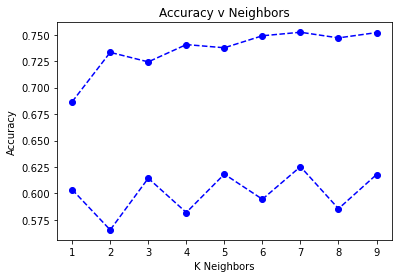

In [11]:
# knee plot visualiztion to assist with neighbor selection

plt.plot(centers, accuracy_scores, linestyle='--', marker='o', color='b');
plt.plot(centers, roc_auc_scores, linestyle='--', marker='o', color='b');
plt.xlabel('K Neighbors');
plt.ylabel('Accuracy');
plt.title('Accuracy v Neighbors')

5 neighbors produced the highest accuracy and ROC AUC score with least risk of overfitting.

In [12]:
red_accuracy_scores = []
red_roc_auc_scores = []
for n in centers:

    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(redX_train, redy_train)
    pred = knn.predict(redX_test)
    score = knn.score(redX_test, redy_test)
    cm = confusion_matrix(y_test, pred)
    print('WITH K =', n)
    print(cm)
    TP, TN, FP, FN = cm[0,0], cm[1,1], cm[1,0], cm[0,1]
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    redrocaucscore = roc_auc_score (y_test, pred)
    print(f'accuracy is {accuracy} and ROC AUC is {redrocaucscore}')
    red_accuracy_scores.append(accuracy)
    red_roc_auc_scores.append(redrocaucscore)


WITH K = 1
[[1619  560]
 [ 483  338]]
accuracy is 0.6523333333333333 and ROC AUC is 0.5773472170127991
WITH K = 2
[[1988  191]
 [ 643  178]]
accuracy is 0.722 and ROC AUC is 0.5645769411149165
WITH K = 3
[[1740  439]
 [ 482  339]]
accuracy is 0.693 and ROC AUC is 0.6057212602412912
WITH K = 4
[[2012  167]
 [ 627  194]]
accuracy is 0.7353333333333333 and ROC AUC is 0.5798282688423827
WITH K = 5
[[1891  288]
 [ 508  313]]
accuracy is 0.7346666666666667 and ROC AUC is 0.624535833409262
WITH K = 6
[[2032  147]
 [ 633  188]]
accuracy is 0.74 and ROC AUC is 0.5807634495815722
WITH K = 7
[[1898  281]
 [ 535  286]]
accuracy is 0.728 and ROC AUC is 0.6096987130504389
WITH K = 8
[[2037  142]
 [ 643  178]]
accuracy is 0.7383333333333333 and ROC AUC is 0.5758206308808642
WITH K = 9
[[1946  233]
 [ 570  251]]
accuracy is 0.7323333333333333 and ROC AUC is 0.5993974708196218


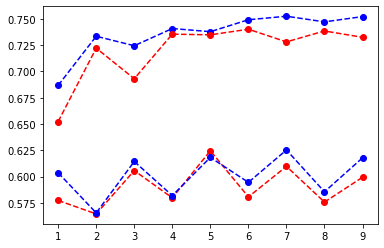

In [13]:
plt.plot(centers, accuracy_scores, linestyle='--', marker='o', color='b');
plt.plot(centers, red_accuracy_scores, linestyle='--', marker='o', color='r');
plt.plot(centers, red_roc_auc_scores, linestyle='--', marker='o', color='r');
plt.plot(centers, roc_auc_scores, linestyle='--', marker='o', color='b');

Visually, the Accuracy and ROC-AUC scores are best at 5 neighbors for the full and reduced model.

In [14]:
# independent t-test
ttest_ind(accuracy_scores, red_accuracy_scores), ttest_ind(roc_auc_scores, red_roc_auc_scores)

(Ttest_indResult(statistic=1.3772342551463086, pvalue=0.18740317118547511),
 Ttest_indResult(statistic=1.056982822729248, pvalue=0.3062180221857238))


The above T-Test shows there isn't a significant difference between the accuracy of the full model and the reduced model. The p-value is 0.18, which is greater than 0.05, so we fail to reject the null hypothesis that the two means are equal. This means that the accuracy of the full model and the reduced model are the same when using 10 neighbors. The same is true for the ROC-AUC scores, with a p-value of 0.3. With no significant difference between the two models, deciding between the two comes down to the models computational expense. Since the data is already reduced, the reduced model is the better choice due to less features and same k-neighebors ensuring a faster run time.

In [15]:
%%timeit
#verification of computational expense

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
score = knn.score(X_test, y_test)


559 ms ± 5.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
%%timeit
#verification of computational expense

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(redX_train, redy_train)
pred = knn.predict(redX_test)
score = knn.score(redX_test, redy_test)

122 ms ± 2.36 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [17]:
misclass = 1 - accuracy
precision = TP/(TP+FP)
recall = TP/(TP+FN)
specificity = TN/(TN+FP)
F1 = (2 * ((precision * recall)/(precision + recall)))
accuracy = (TP+TN)/(TP+TN+FP+FN)

In [18]:
#Final selection of model with all appropriate metrics
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(redX_train, redy_train)
pred = knn.predict(redX_test)
score = knn.score(redX_test, redy_test)
cm = confusion_matrix(y_test, pred)
print('WITH K =', 5)
print(cm)
TP, TN, FP, FN = cm[0,0], cm[1,1], cm[1,0], cm[0,1]
redrocaucscore = roc_auc_score (y_test, pred)
print(f'The accuracy of the reduced feature KNN is {round(accuracy, 2)} with a misclassification rate of {round(misclass, 2)} and ROC AUC is {round(redrocaucscore, 2)} .\n'
      f'The model has a precision positive rate of {round(precision, 2)}, recall/true positive rate of {round(recall, 2)}.\n'
      f'The specificity/true negative rate of the model is {round(specificity, 2)}.\n'
      f'THe harmonic mean f1=Score is {round(F1, 2)}')

WITH K = 5
[[1891  288]
 [ 508  313]]
The accuracy of the reduced feature KNN is 0.73 with a misclassification rate of 0.27 and ROC AUC is 0.62 .
The model has a precision positive rate of 0.77, recall/true positive rate of 0.89.
The specificity/true negative rate of the model is 0.31.
THe harmonic mean f1=Score is 0.83


The reduced model is 4.4 times faster than the full model. for similar accuracy and roc-auc scores. The reduced model is the better choice for this dataset.

Part V: Data Summary and Implications

E.  Summarize your data analysis by doing the following:

1.  Explain the accuracy and the area under the curve (AUC) of your classification model.


In [19]:
print(f'Accuracy of the 5 neighbors reduced model is {round(red_accuracy_scores[4], 2)} meaning that the model correctly predicts 73% of the time.\n'
      f'ROC AUC is {round(red_roc_auc_scores[4], 2)} meaning the model correctly classifies true positives and true negatives 62% of the time.')

Accuracy of the 5 neighbors reduced model is 0.73 meaning that the model correctly predicts 73% of the time.
ROC AUC is 0.62 meaning the model correctly classifies true positives and true negatives 62% of the time.


The reduced model is performing well without overfitting.

2. Discuss the results and implications of your classification analysis.

    While accuracy points to not overfitting, each test is under performing compared ot Logistic Regression. While accuracy does meet the 70% goal with few features, the ROC-AUC score is not as high as the Logistic Regression model. However the Logistic regression assumes a linear relationship which may not be the case here. A box-tidwell test could be used to determine if the data is linear or not. If the data is not linear, then the KNN model is the better choice. If the data is linear, then the Logistic Regression model is the better choice. Regardless, both models and the former logistic regression model assist in predicting more than 70% of the time, which is the goal of the analysis.


4. Discuss one limitation of your data analysis.

As mentioned in previous analysis, this data set is low quality due to the amount of survey generated data. Due to the unreliable information and missing info (26% of the data from initial cleaning) introduces bias into the dataset from chosen cleaning methods. The assumption of features selected is informed by previous analysis on the same dataset with quality issues. There is also no information on what `Churn` means (reducing services, changing from one `internet service` to another, et cet).

5. Recommend a course of action for the real-world organizational situation from part A1 based on your results and implications discussed in part E2.

Using this model a likely `Churn` customer can be idenitifed with good accuracy. I recommend using this model in conjunction with the logistic regression model to reach out to specific customers regarding deals, bundles and other incentives to keep them as customers. This will help the company retain customers and increase revenue. Combined further with the Linnear Regression model targetting tenure, a customer's parameters can be tuned to reduce risk of `Churn` and increase revenue.

 
## Sources

Hachcham, A. (2022, July 22). The KNN algorithm - explanation, opportunities, limitations. neptune.ai. Retrieved August 28, 2022, from https://neptune.ai/blog/knn-algorithm-explanation-opportunities-limitations
joshstarmer. (2017, June 26). StatQuest: K-nearest neighbors, clearly explained. YouTube. Retrieved August 24, 2022, from https://www.youtube.com/watch?v=HVXime0nQeI
Saji, B. (2021, January 20). K nearest neighbor Classification Algorithm: Knn in python. Analytics Vidhya. Retrieved August 28, 2022, from https://www.analyticsvidhya.com/blog/2021/01/a-quick-introduction-to-k-nearest-neighbor-knn-classification-using-python/
scikit-learn developers . (n.d.). Sklearn.neighbors.kneighborsclassifier. scikit. Retrieved August 24, 2022, from https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [20]:
!jupyter nbconvert D209KNN.ipynb --to webpdf

[NbConvertApp] Converting notebook D209KNN.ipynb to webpdf
[NbConvertApp] Building PDF
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 247190 bytes to D209KNN.pdf
